<a href="https://colab.research.google.com/github/sriram333/Cognitive-Face-Windows/blob/master/Applied_Statistics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Applied statistics Assignment

In [1]:
#Step-1 Import Necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Step-2 Read the data from insurance.csv file

data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#3. Perform basic EDA
#a. Shape of the data
print("Shape of the Data :")
print(data.shape)


Shape of the Data :
(1338, 7)


In [5]:
#b. Data type of each attribute
print("Data type of each attribute :")
print(data.info())


Data type of each attribute :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [7]:
#c. Checking the presence of missing values

Insurance_data = data.copy()
Insurance_data.isna().apply(pd.value_counts)

#No missing values are present in this dataset


,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


No missing values are present in this dataset.

In [8]:
#d. 5 point summary of numerical attributes
print("Summary of Numerical attributes :")
Insurance_data.describe().T

Summary of Numerical attributes :


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


1. By looking at the summary of attributes, mean age is near to 40 and so most of them are adults. 
2. Mean number of children, people have is around 1 and 75% of people have 2 or less children.
3. Ideally bmi can be around 18.5 to 24.9 which is good. We can see that mean bmi is 30 but the charges(individual medical costs billed by health insurance) claimed are skewed i.e mean charges is around 13270 which is more for a person with average bmi 30. Also, 75% of the people have bmi of around 34.6 which would require basic medical assistance and only few require critical care.



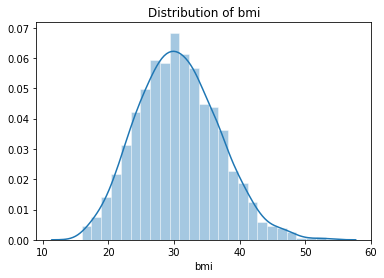

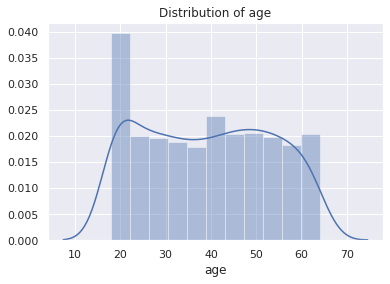

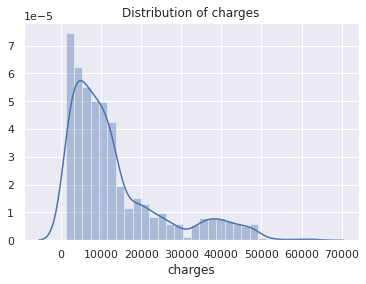

In [9]:
#e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
#Distribution of bmi
plt.title("Distribution of bmi")
sns.set()
sns.distplot(Insurance_data.bmi)
plt.show()

#Distribution of age
plt.title("Distribution of age")
sns.set()
sns.distplot(Insurance_data.age)
plt.show()

#Distribution of charges
plt.title("Distribution of charges")
sns.set()
sns.distplot(Insurance_data.charges)
plt.show()


1. bmi is normally distributed, we can clearly see from the graph.
2. age is almost uniformly distributed.
3. Charges distribution is quite chaotic or skewed.

In [10]:
#f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

Skewness_data = (Insurance_data.skew())
Skewness_D = Skewness_data.drop(index='children').reindex(['bmi','age','charges'])
print('Skewness of bmi, age, charges :')
Skewness_D

Skewness of bmi, age, charges :


bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

From the measurement of skewness it is evident that charges are highly skewed.

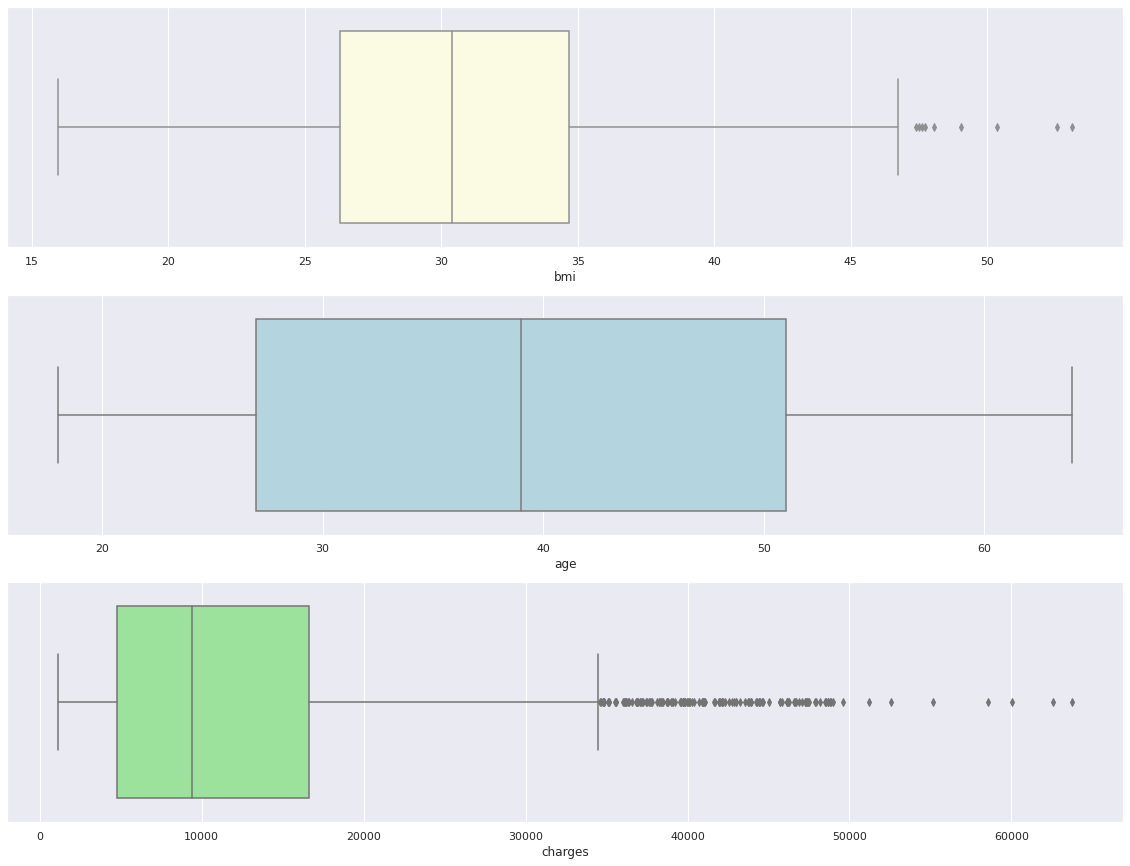

In [11]:
#g. Checking for the outliers in bmi, age, charges
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= Insurance_data.bmi, color='lightyellow')

plt.subplot(3,1,2)
sns.boxplot(x= Insurance_data.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= Insurance_data.charges, color='lightgreen')

plt.show()

There are no outliers in age. 
Fewer outliers in bmi.
But number of outliers are very high for charges, since it is highly skewed.

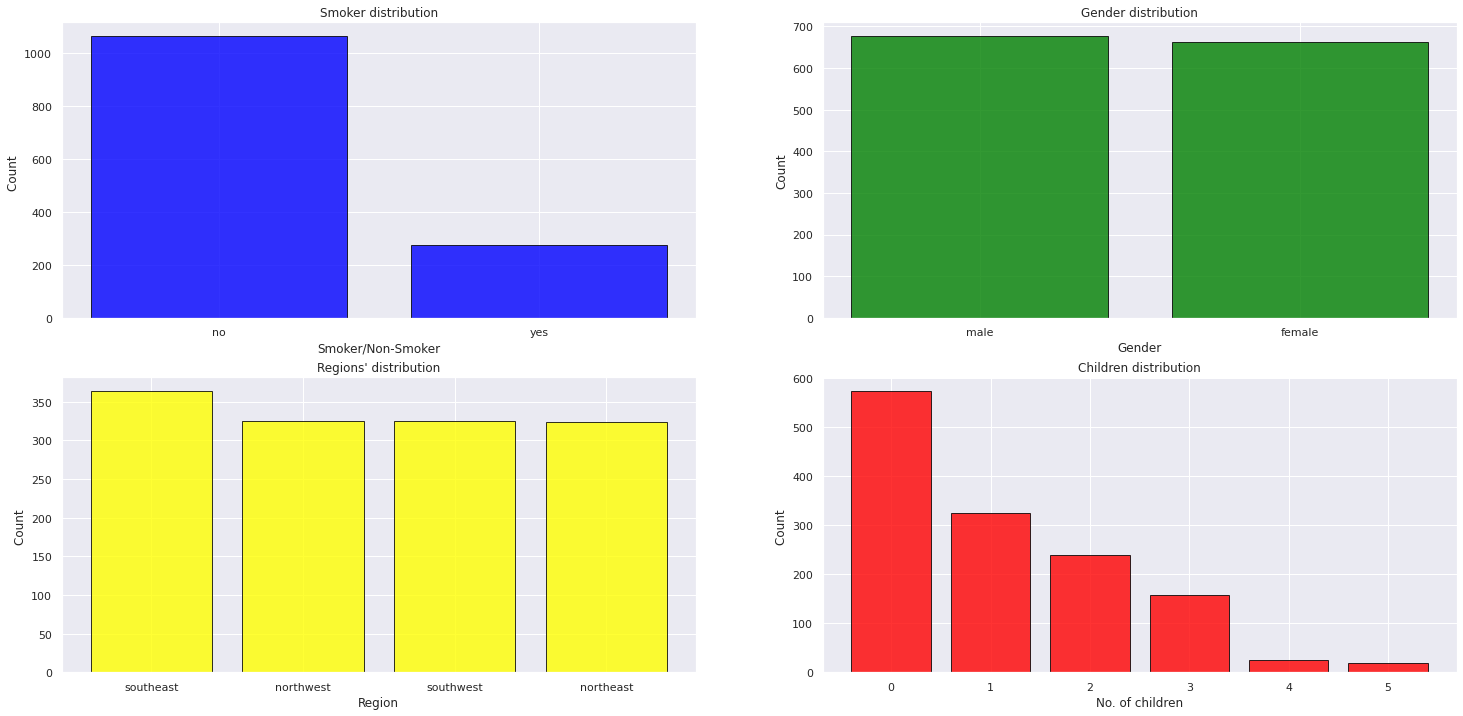

In [12]:
#h. Distribution of categorical columns in Insurance data
plt.figure(figsize=(25,25))
x = Insurance_data.smoker.value_counts().index   
y = [Insurance_data['smoker'].value_counts()[i] for i in x]  
plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'blue',edgecolor = 'black',alpha = 0.8)
plt.xlabel('Smoker/Non-Smoker')
plt.ylabel('Count ')
plt.title('Smoker distribution')


x1 = Insurance_data.sex.value_counts().index    
y1 = [Insurance_data['sex'].value_counts()[j] for j in x1]   
plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'green',edgecolor = 'black',alpha = 0.8)  
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')


x2 = Insurance_data.region.value_counts().index   
y2 = [Insurance_data['region'].value_counts()[k] for k in x2]   
plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'yellow',edgecolor = 'black',alpha = 0.8)  
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")



x3 = Insurance_data.children.value_counts().index   
y3 = [Insurance_data['children'].value_counts()[l] for l in x3]  

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'red',edgecolor = 'black',alpha = 0.8)  
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()






1. Number of non-smokers are more than that of smokers in the given data.
2. Gender is uniformly distributed.
3. Regions are also almost uniformly distributed.
4. Very few Instances have number of children more than 2 , but most of the instances have number of children less than or equal to 2.

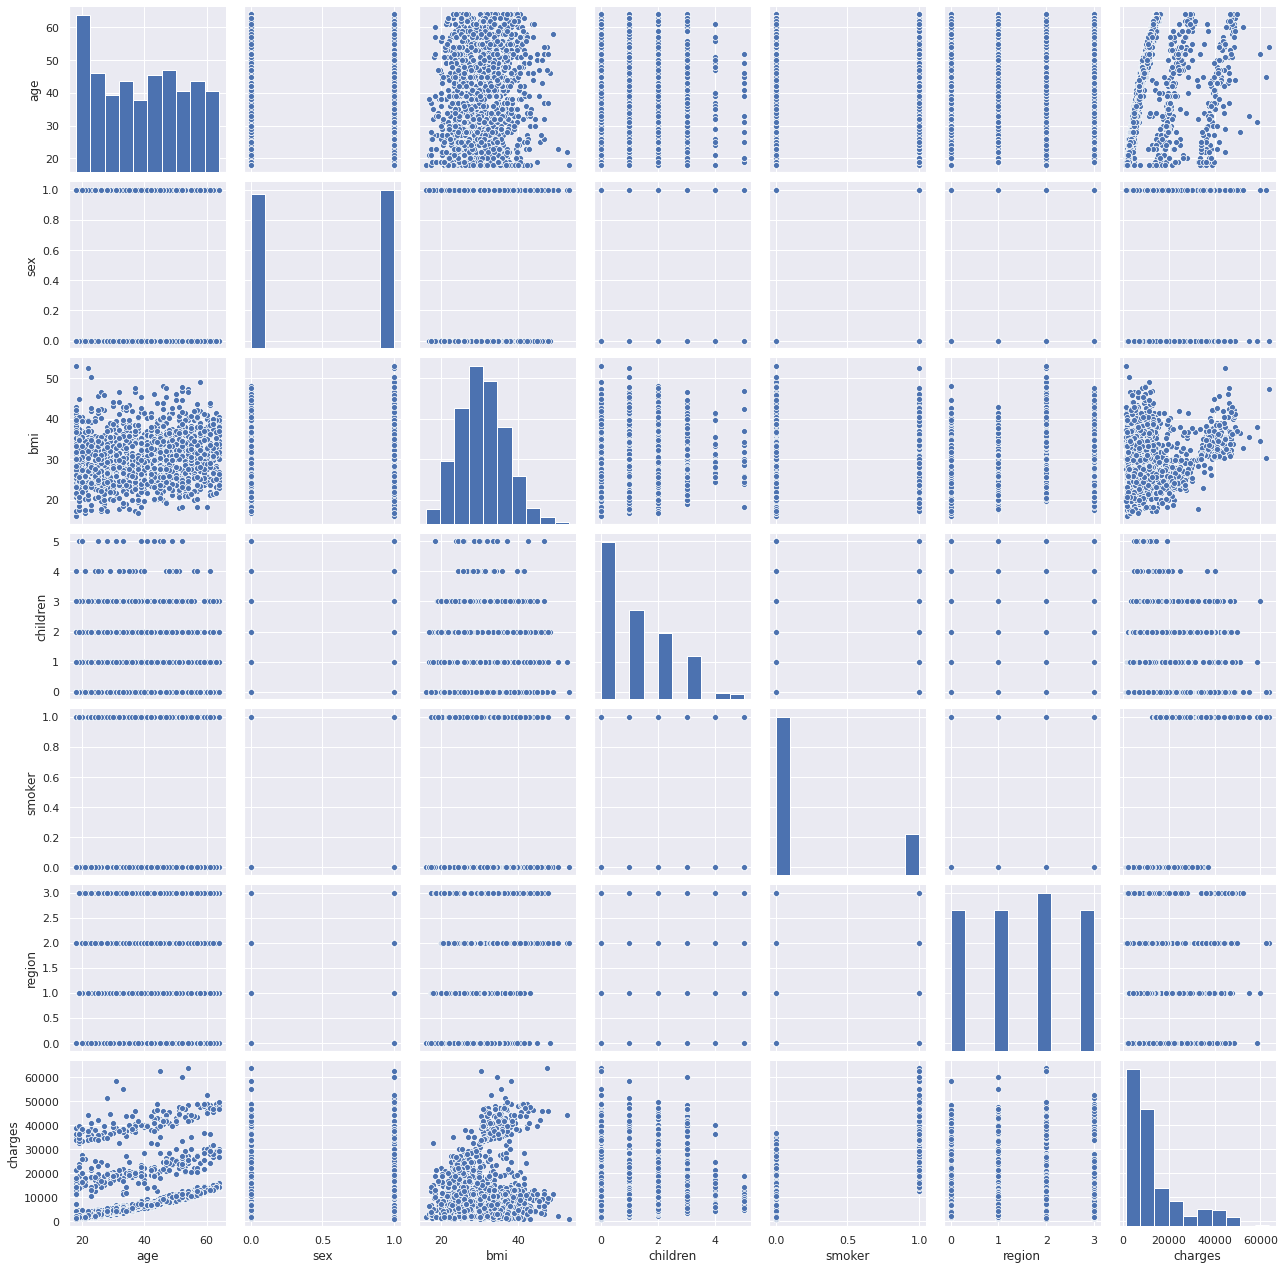

In [0]:
#i. Pair plot that includes all the columns of the data frame
Insurance_data_encoded = copy.deepcopy(Insurance_data)
Insurance_data_encoded.loc[:,['smoker', 'sex', 'region']] = Insurance_data_encoded.loc[:,['smoker', 'sex', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(Insurance_data_encoded)
plt.show() 

1. From this pair plot it is evident that age and charges are related and younger people are charged less than that of older ones.

2. Also, charges of smokers is higher than the charges of non-smokers


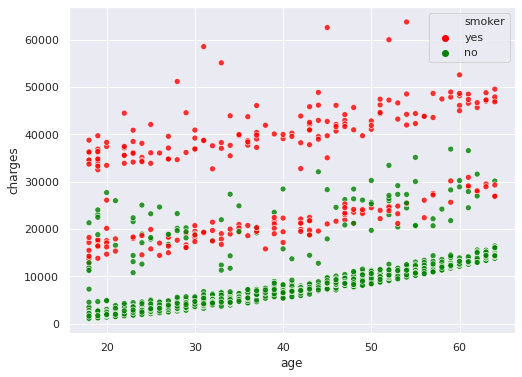

In [13]:
#4 Answer the following questions with statistical evidence
#a. Do charges of people who smoke differ significantly from the people who don't?
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(Insurance_data.age, Insurance_data.charges,hue=Insurance_data.smoker,palette= ['red','green'] ,alpha=0.8)
plt.show()

In [14]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(Insurance_data[Insurance_data.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(Insurance_data[Insurance_data.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) is less than 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) is greater than 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) is less than 0.05


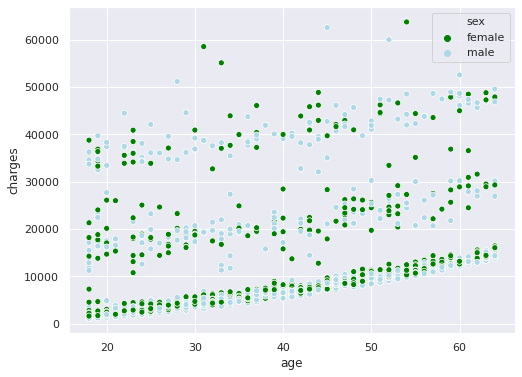

In [15]:
#b. Does bmi of males differ significantly from that of females?

plt.figure(figsize=(8,6))
sns.scatterplot(Insurance_data.age, Insurance_data.charges,hue=Insurance_data.sex,palette= ['green','lightblue'] )
plt.show()

In [16]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   
Ha = "Gender has an effect on bmi"   

x = np.array(Insurance_data[Insurance_data.sex == 'male'].bmi)  
y = np.array(Insurance_data[Insurance_data.sex == 'female'].bmi) 
#Performing an Independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) is less than 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) is greater than 0.05')

Gender has no effect on bmi as the p_value (0.09) is greater than 0.05


In [19]:
#c. Is the proportion of smokers significantly different in different genders?

# Chi_square test to check if smoking habits are different for different genders - used to test relationship between categorical variables
Ho = "Gender has no effect on smoking habits"   
Ha = "Gender has an effect on smoking habits"   

gen_smoker = pd.crosstab(Insurance_data['sex'],Insurance_data['smoker'])  
# Contingency table of sex and smoker attributes
print(gen_smoker)
chi, p_value, dof, expected =  stats.chi2_contingency(gen_smoker)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) is less than 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) is greater than 0.05')

smoker   no  yes
sex             
female  547  115
male    517  159
Gender has an effect on smoking habits as the p_value (0.007) is less than 0.05


In [20]:
#d. Is the distribution of bmi across women with no children, one child and two children, the same?
# F-Test to see if the distributions of bmi values for females having different number of children, are significantly different
#It tells whether two or more groups are similar or not based on their mean similarity and f-score.
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_data = copy.deepcopy(Insurance_data[Insurance_data['sex'] == 'female'])

zero = female_data[female_data.children == 0]['bmi']
one = female_data[female_data.children == 1]['bmi']
two = female_data[female_data.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) is less than 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) is greater than 0.05')

No. of children has no effect on bmi as the p_value (0.716) is greater than 0.05
